<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Week 3 Lecture 2</div>
<div style="text-align: right">Dino Konstantopoulos, 15 September 2019</div>

Let's implement a *complete* **Genetic Algorithm** (GA) to do data science: *figure out the curve so that we can throw away the data*.

Let's assume a polynomial curve. There is a theorem in linear algebra that says that you can fit a polynomial of degree $n$ to go through any number of $n$ datapoints.

The problem with polyonmial curves is that they wiggle a lot (well, less than $Fourier$ series, but that is another chapter), so an overfit to the training points may produce wild wiggles and thus wrong results on test data.

For example, this is $2.2{x}^{1}-81.7{x}^{3}+1576.6{x}^{5}-12865{x}^{7}+53760.4{x}^{9}-128928.6{x}^{11}+185521.7{x}^{13}-158630{x}^{15}+74398.9{x}^{17}-14754.5{x}^{19}$:

<br />
<center>
    <img src="ipynb.images/polynomial.png" width=400 />
</center>

In [2]:
"""
The y=target is to find the w's in this equation:
    y = w3x^3+w2x^2+w1x^1+w0x^0
    such that the curve above passes through 4 points (x1, y1), (x2, y2), (x3, y3), (x4, y4)
    What are the best values for the 4 weights w0 to w3?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation (predetermined)
training_data = [(-4,-200), (-2,-1), (2,4), (4, 200)]

# Number of the weights we are looking to optimize.
num_weights = len(training_data)

"""
Genetic algorithm hyperparameters:
    Mating pool size
    Population size
    Mutation rate
"""
pop = 1000
num_chromosomes = num_weights
chromosome_size = (pop, num_chromosomes)
mutation_rate = 0.1

Let's have fun with our genetic algorithm.

Planet **Berk** is populated by **berkians** with 4 chromosomes $(w_0, w_1, w_2, w_3)$. That is their *genotype*.

<br />
<center>
    <img src="ipynb.images/berkians.jpg" width=600 />
</center>

Their *phenotype* is the value of $y = w_3x^3+w_2x^2+w_1x^1+w_0x^0$

Berkians are just a much simpler version of humans. *Your* genotype is your DNA. *Your* phenotype is how pretty you look, how strong you are, how smart, how psychologically stable, etc.

Berkians *also* have a notion of *prettyness*, or ***fitness***: Given 4 points $(x, y)$ determined by the berkian god, it is the total value of the absolute value of their phenotype minus $y$, for each $x$: $$\sum_{i=0, 4} |y_ i - (w_3x_i^3+w_2x_i^2+w_1x_i^1+w_0x_i^0) |$$ 

In other words, prettyness/fitness for a berkian is that their chromosome weights are as close as possible to the coefficients of our desired polynomial curve: the one that goes through our predetermined 4 points.

<br />
<center>
    <img src="ipynb.images/mirror.jpg" width=600 />
</center>

Berkians have sex in the following way: The prettiest berkians select the prettiest berkians and they have sex and a new berkian is born that shares the first half of the chromosomes of the first berkian and the second half of the chromosomes of the second berkian.

Berkians (like us) live under a sun that has solar flares that sends radioactivity over to planet Berk, which produces random mutations in the berkian chromosome. Random mutations replace one of the chromosomes, picked randomly, in the berkian genotype with a random number.

Berkians, like americans, want to produce a **Marilyn Monroe** for their version of Hollywood to help us with our data science. So they want to have lots of sex and sit at the beach for long tanning sessions in order to produce the prettiest berkian under their sun, as determined by their berkian god.

<br />
<center>
    <img src="ipynb.images/hollywood.jpg" width=600 />
</center>

How many generations will it take for berkians to get close to their **Marilyn Monroe** dream, and solve our data science? 

There are *hyperparamater* in the berkian universe (leading to many parallel berkian universes, for each value of the hyperparameters), kind of like in Star Trek parallel universes. It is how often random mutations happen under the berkian sun, the size of the berkian population, the number of berkian chromosomes. For the simplest possible parallel universe, we will assume one random mutation per generation on a random index of the berkian genotype.

In [3]:
from random import choices
import random

def and_god_created_berkians(how_many):
    berkians = []
    for berk in range(how_many):
        berk = []
        for i in range(4):
            chromosome = random.uniform(-5., 5.)
            berk.append(chromosome)
        berkians.append(berk)
    return berkians
    
def phenotype(genes, x):
    y = genes[3] * x**3 + genes[2] * x**2 + genes[1] * x**1 + genes[0] * x**0
    return y

def berk_fitness(list_of_points, berk):
    # Calculating the fitness value of a berkian, best possible fitness is infinity
    fitness = 0
    for x,y in list_of_points:
        fitness += 1. / (y - phenotype(berk, x))**2
    return fitness

def planet_berk_fitness(list_of_points, berkians):
    fitnesses = []
    for berk in berkians:
        fitnesses.append(berk_fitness(list_of_points, berk))
    return fitnesses

def planet_berk_average_fitness(list_of_points, berkians):
    fitness = 0
    for berk in berkians:
        fitness += berk_fitness(list_of_points, berk)
    return fitness / len(berkians)

def planet_berk_top_fittest(list_of_points, berkians, how_many):
    # Returning the top fittest berkians
    fitness = []
    for berk in berkians:
        fitness.append(berk_fitness(list_of_points, berk))
    
    top_fittest = []
    for i in range(int(how_many)):
        fittest = 0
        for y in fitness:
            if y > fittest:
                fittest = i
        
        top_fittest.append(berkians[i])
        fitness[i] = 0
        
    return top_fittest

def select_berk_mating_pool_2(list_of_points, berkians, percent):
    # Selecting the best berkians in the current generation as parents 
    # for producing the offspring in the next generation. Pick
    # the top percent%
    return planet_berk_top_fittest(list_of_points, berkians, len(berkians) * percent)

def crossover2(parents):
    offspring = []
    
    # The point at which crossover takes place between two parent berkians. Usually, it is at the center.
    crossover_point = 2

    for i in range(len(parents)):
        couple = choices(range(len(parents)), k=2)
        baby_berk = [0,0,0,0]
        
        # Index of the first parent to mate.
        parent1_idx = couple[0]
        
        # Index of the second parent to mate.
        parent2_idx = couple[1]
        
        # The new offspring will have its first half of its genes taken from the first parent.
        baby_berk[0:crossover_point] = parents[parent1_idx][0:crossover_point]
        
        # The new offspring will have its second half of its genes taken from the second parent.
        baby_berk[crossover_point:] = parents[parent2_idx][crossover_point:]
        
        # add baby_berk to the offspring generation
        offspring.append(baby_berk)
        
    return offspring

def mutation2(parents, num_mutations=1):
    for parent in parents:
        for mutation in range(num_mutations):
            mutation_location = choices(range(4), k=1)[0]
            mutation = random.uniform(-1., 1.)
            parent[mutation_location] += mutation
            
    return parents

## Parent selection

Parent Selection is the process of selecting berkian parents which mate and recombine to create berkian offspring for the next generation. Parent selection is very crucial to the convergence rate of the GA as good parents drive individuals to a better and fitter solutions.

However, care should be taken to prevent one extremely fit solution from taking over the entire population in a few generations, as this leads to the solutions being close to one another in the solution space thereby leading to a loss of ***diversity***. Maintaining good diversity in the population is extremely crucial for the success of a GA. This taking up of the entire population by one extremely fit solution is known as ***premature convergence** and is an undesirable condition in a GA.

***Fitness Proportionate Selection*** is one of the most popular ways of parent selection. In this every berkian can become a parent with a probability which is proportional to its fitness. Therefore, fitter berkians have a higher chance of mating and propagating their features to the next generation. Therefore, such a selection strategy applies a selection pressure to the more fit individuals in the population, evolving better individuals over time.

Consider a circular wheel. The wheel is divided into $n$ pies, where $n$ is the number of berkians on planet Berk. Each berkian gets a portion of the circle which is proportional to its fitness value.

In a roulette wheel selection, the circular wheel is divided as described before. A fixed point is chosen on the wheel circumference as shown and the wheel is rotated. The region of the wheel which comes in front of the fixed point is chosen as the parent. For the second parent, the same process is repeated.

<br />
<center>
    <img src="ipynb.images/roulette-wheel.png" width=600 />
</center>

It is clear that a fitter berkian has a greater pie on the wheel and therefore a greater chance of landing in front of the fixed point when the wheel is rotated. Therefore, the probability of choosing a berkian depends directly on its fitness.

Implementation wise, we use the following steps −

Calculate $F$ = the sum of all fitnesses, the fitness of the berkian population on planet berk.

Generate a random number $r$ between $0$ and $F$.

Starting from the top of the berkian population, keep adding the finesses to the partial sum $p$.

The individual for which $p$ exceeds $r$ is the chosen individual.

Let's select `num` berkians according to fitness proportionate roulette wheel selection. Those are the berkians that will have sex between each other. We'll mate the first two, then the next two, etc. Let's make sure we always select `num` as an even number.

In [4]:
import numpy as np
def roulette_select(list_of_points, population, num):
    """ Roulette selection, implemented according to:
        <http://stackoverflow.com/questions/177271/roulette
        -selection-in-genetic-algorithms/177278#177278>
    """
    fitnesses = planet_berk_fitness(list_of_points, population)
    total_fitness = float(sum(fitnesses))
    rel_fitness = [f/total_fitness for f in fitnesses]
    
    # Generate probability intervals for each individual
    probs = [sum(rel_fitness[:i+1]) for i in range(len(rel_fitness))]
    
    # Draw new population
    new_population = []
    for n in range(num):
        r = np.random.rand()
        for (i, individual) in enumerate(population):
            if r <= probs[i]:
                new_population.append(individual)
                break
                
    return new_population

In [5]:
#Creating the initial berkian population.
#new_population = numpy.random.uniform(low=-10.0, high=10.0, size=chromosome_size)
#print(new_population[0:10, :])

"""
berkians[0] = [2.4,  0.7, 8, -2]
berkians[1] = [-0.4, 2.7, 5, -1]
berkians[2] = [-1,   2,   2, -3]
berkians[3] = [4,    7,   12, 6.1]
berkians[4] = [3.1,  4,   0,  2.4]
berkians[5] = [-2,   3,   -7, 6]
...
"""

berkians = and_god_created_berkians(1000)
berkians[0:10]

[[-4.511278099454504,
  2.510178988786219,
  -3.8300566790035018,
  0.6878433363655514],
 [-1.294359208813498,
  -4.159554728520714,
  -2.6491809470009353,
  -4.950601831162538],
 [3.6653057137940515,
  2.9934801760611753,
  -0.9471264644872424,
  0.6315875613992237],
 [-4.8451255098938155,
  -4.447198673864045,
  3.5056780606686893,
  2.2103432095639377],
 [-0.4586609648852402, -4.76510422847611, 3.79489482465263, 4.114604793551477],
 [1.9357043961961926,
  1.109983037378953,
  4.128950375618105,
  3.1690737237142947],
 [-4.866893070667668,
  -4.1936987503465115,
  -3.1688319889344974,
  -4.324233305105016],
 [0.33443261329153007,
  2.611055749775467,
  0.4000615568450794,
  1.5473567077390626],
 [-3.8424748317709234,
  2.8213012756726163,
  -0.3897536252074758,
  2.7093138209271395],
 [-3.145093136204112,
  3.7396589807868477,
  1.3839461903909909,
  -1.792949100657728]]

In [6]:
# Return the index of that solution corresponding to the best current fitness
berk_champ_0 = planet_berk_top_fittest(training_data, berkians, 1)[0]

num_generations = 1000
for generation in range(num_generations):
    print("Generation: " + str(generation) + ", fitness: " + str(planet_berk_average_fitness(training_data, berkians)))
    
    # Selecting the best parents in the population for mating
    #fittest_berkians = select_berk_mating_pool_2(training_data, berkians, .2)
    fittest_berkians = roulette_select(training_data, berkians, 200)

    # Sex: Generating next generation using crossover
    baby_berks = crossover2(fittest_berkians)
    
    # Mix new generation with old generation, preserving parents
    for i in range(len(baby_berks)):
        for j in range(int(len(berkians) * .2)):
            if (berkians[j] not in fittest_berkians):
                berkians[j] = baby_berks[i]
                break

    # Mutation: Adding some variations to next generation using mutation
    berkians = mutation2(berkians)


Generation: 0, fitness: 2111.806225941725
Generation: 1, fitness: 7.753632153062709
Generation: 2, fitness: 21.458567703541075
Generation: 3, fitness: 223.19237647432053
Generation: 4, fitness: 43.814982777378326
Generation: 5, fitness: 14.632737672810997
Generation: 6, fitness: 104.57194892548294
Generation: 7, fitness: 109.35967609775254
Generation: 8, fitness: 32.79868907874038
Generation: 9, fitness: 2866.2613540798397
Generation: 10, fitness: 6.96856298979121
Generation: 11, fitness: 248.61121264496407
Generation: 12, fitness: 17.985391253170476
Generation: 13, fitness: 428.34099703634234
Generation: 14, fitness: 31.956999530294024
Generation: 15, fitness: 16.43240564527456
Generation: 16, fitness: 24.705702486250424
Generation: 17, fitness: 1551.1320966135345
Generation: 18, fitness: 48.23165161237061
Generation: 19, fitness: 2.3230474773655785
Generation: 20, fitness: 36.799977776043235
Generation: 21, fitness: 16.136158356470304
Generation: 22, fitness: 312.00340556595575
Gener

Generation: 189, fitness: 14.145821315162065
Generation: 190, fitness: 126.88830295717551
Generation: 191, fitness: 7.633879859677266
Generation: 192, fitness: 712.3418164251357
Generation: 193, fitness: 55.3788301456545
Generation: 194, fitness: 26.883041507817122
Generation: 195, fitness: 6.870492582838224
Generation: 196, fitness: 10.02940958662003
Generation: 197, fitness: 630.8188125538888
Generation: 198, fitness: 371.8685566269159
Generation: 199, fitness: 6359.02957701865
Generation: 200, fitness: 6793.252379986361
Generation: 201, fitness: 211.12899812962024
Generation: 202, fitness: 94.8322871581506
Generation: 203, fitness: 27.830528440261784
Generation: 204, fitness: 2.636157054433431
Generation: 205, fitness: 9.315134048341985
Generation: 206, fitness: 2041.1668098124571
Generation: 207, fitness: 28.077715105319456
Generation: 208, fitness: 341.0598023993998
Generation: 209, fitness: 276.0158076080219
Generation: 210, fitness: 46.78076490103721
Generation: 211, fitness: 25

Generation: 377, fitness: 3.236742437503781
Generation: 378, fitness: 133.57491150992354
Generation: 379, fitness: 29.590335089539217
Generation: 380, fitness: 6.550184903352384
Generation: 381, fitness: 6.985652517170048
Generation: 382, fitness: 71.7062209736758
Generation: 383, fitness: 16.339426019098294
Generation: 384, fitness: 12.360097753923375
Generation: 385, fitness: 13.188832587221162
Generation: 386, fitness: 2.326390163560783
Generation: 387, fitness: 6.512256307371876
Generation: 388, fitness: 88.69191374169156
Generation: 389, fitness: 293.60195506940676
Generation: 390, fitness: 10.727073206789784
Generation: 391, fitness: 242.69871430213405
Generation: 392, fitness: 296.0628645281447
Generation: 393, fitness: 3.0393451906025244
Generation: 394, fitness: 5.725715495801811
Generation: 395, fitness: 174.18587930896504
Generation: 396, fitness: 126.44772557950976
Generation: 397, fitness: 6.990614963471429
Generation: 398, fitness: 22656.564609659894
Generation: 399, fitn

Generation: 568, fitness: 3438.9910776744523
Generation: 569, fitness: 516.1153834208726
Generation: 570, fitness: 13002.133879099416
Generation: 571, fitness: 111.12478972773464
Generation: 572, fitness: 2567.140175863161
Generation: 573, fitness: 31.398510364279783
Generation: 574, fitness: 44.49771373706446
Generation: 575, fitness: 4.20493016438011
Generation: 576, fitness: 137.59927815472977
Generation: 577, fitness: 66.31097621412367
Generation: 578, fitness: 35.38680414984791
Generation: 579, fitness: 90.58286328316767
Generation: 580, fitness: 15.572479480120371
Generation: 581, fitness: 31.413254485589725
Generation: 582, fitness: 125.34130282777406
Generation: 583, fitness: 7.565350750429107
Generation: 584, fitness: 559.7022312052655
Generation: 585, fitness: 302.63844444176755
Generation: 586, fitness: 4082.278687503311
Generation: 587, fitness: 220.48907736896064
Generation: 588, fitness: 12.113880061795133
Generation: 589, fitness: 138.15558049996562
Generation: 590, fitn

Generation: 756, fitness: 16.859745060131353
Generation: 757, fitness: 5.7139700417978325
Generation: 758, fitness: 8.191380783742126
Generation: 759, fitness: 436.5236848730907
Generation: 760, fitness: 58.499085412694555
Generation: 761, fitness: 8298.993171636706
Generation: 762, fitness: 52.17873706838182
Generation: 763, fitness: 6.944140788749751
Generation: 764, fitness: 88.99017050365126
Generation: 765, fitness: 4.941523102903258
Generation: 766, fitness: 147.3891323979681
Generation: 767, fitness: 6.817700610442378
Generation: 768, fitness: 7.902538296137082
Generation: 769, fitness: 39785.407524553004
Generation: 770, fitness: 416.394366776723
Generation: 771, fitness: 1.8084670811606542
Generation: 772, fitness: 23.183297518586915
Generation: 773, fitness: 278.3473996163327
Generation: 774, fitness: 1.9040678896083525
Generation: 775, fitness: 3267.857327733168
Generation: 776, fitness: 28.5517030373194
Generation: 777, fitness: 4.784482983713366
Generation: 778, fitness: 1

Generation: 946, fitness: 44.989773708241266
Generation: 947, fitness: 58.2761146038356
Generation: 948, fitness: 9.11124207073253
Generation: 949, fitness: 454919.64054662874
Generation: 950, fitness: 139.00920963786223
Generation: 951, fitness: 25.004817866993715
Generation: 952, fitness: 571.6276875229815
Generation: 953, fitness: 37.02846762133371
Generation: 954, fitness: 74.77650314864569
Generation: 955, fitness: 173.12772400931607
Generation: 956, fitness: 11.264348599540888
Generation: 957, fitness: 15.677938506735812
Generation: 958, fitness: 144.86189948041365
Generation: 959, fitness: 265.7000610307386
Generation: 960, fitness: 523.2489271385131
Generation: 961, fitness: 55.1584887373047
Generation: 962, fitness: 24.904986222749052
Generation: 963, fitness: 343.27800755406815
Generation: 964, fitness: 29.16203594683387
Generation: 965, fitness: 346.831612017573
Generation: 966, fitness: 22.90873414253579
Generation: 967, fitness: 4.438758188006522
Generation: 968, fitness: 

Best solution :  [-3.4276308586182838, 9.531591512158585, -5.408101397651743, 1.8344224760474708]
Best solution fitness :  0.046523858149511266
NumPy's polynomial fit:
       3         2
4.062 x - 0.125 x - 15 x + 2


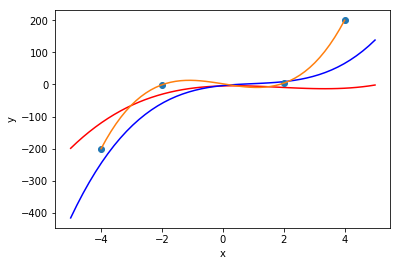

In [7]:
# Return the index of that solution corresponding to the best fitness.
berk_champ = planet_berk_top_fittest(training_data, berkians, 1)[0]

print("Best solution : ", berk_champ)
print("Best solution fitness : ", berk_fitness(training_data, berk_champ))

# plot
import numpy as np
import matplotlib.pyplot
%matplotlib inline
      
x = np.linspace(-5, 5, 50)
y0 = berk_champ_0[3] * x**3 + berk_champ_0[2] * x**2 + berk_champ_0[1] * x**1 + berk_champ_0[0] * x**0
y = berk_champ[3] * x**3 + berk_champ[2] * x**2 + berk_champ[1] * x**1 + berk_champ[0] * x**0
      
matplotlib.pyplot.xlabel("x")
matplotlib.pyplot.ylabel("y")
matplotlib.pyplot.plot(x, y0, color='red')
matplotlib.pyplot.plot(x, y, color='blue')

matplotlib.pyplot.plot(training_data[0][0], training_data[0][1], 'r+')  
matplotlib.pyplot.plot(training_data[1][0], training_data[1][1], 'r+')  
matplotlib.pyplot.plot(training_data[2][0], training_data[2][1], 'r+')  
matplotlib.pyplot.plot(training_data[3][0], training_data[3][1], 'r+')  

# get x and y vectors
points = np.array(training_data)
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)
print("NumPy's polynomial fit:")
print (f)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)
matplotlib.pyplot.plot(x,y,'o', x_new, y_new)